##  Investigating gems

a. We briefly discussed a data set listing diamonds and their characteristic prices and physical attributes in class.  This dataset is provided for you in a ```csv``` file.  Load the dataset ```diamonds.csv``` into your notebook as the variable ```diamonds_df```

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import * 

In [6]:
diamonds_df = pd.read_csv("diamonds.csv")
diamonds_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


b.  Take a look at the dataframe using one of the tools we've discussed in class.  List the columns, what type of variable is in each of the columns and what datatype Python is using to store each of the columns.

Are each of the datatypes consistent with the type of variable used? Why or why not?

In [7]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# There are 11 columns:
# - 1: Unnamed: 0
# - 2: carat
# - 3: cut
# - 4: color
# - 5: clarity
# - 6: depth
# - 7: table
# - 8: price
# - 9: x
# - 10: y
# - 11: z

# Variables 1,7 are int64; variables 2,6,7,9-11 are float64; and variables 3-5 are object types. This makes sense given variables 3-5 are qualitative/categorical, while the rest are quantitative.

c.  Create a side by side boxplot of the range of prices by gem cut.

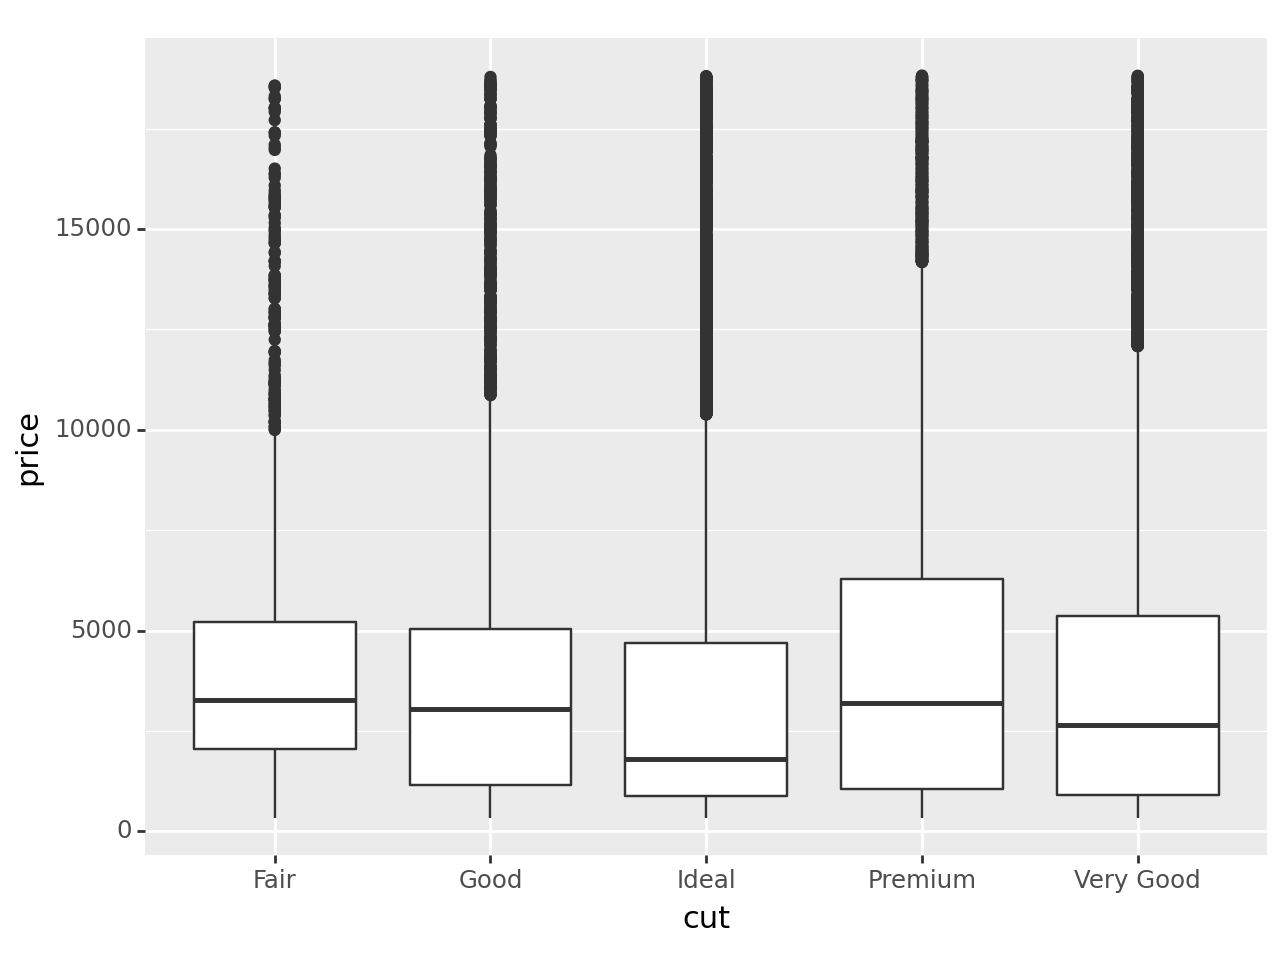

<Figure Size: (640 x 480)>

In [32]:
(
    ggplot(diamonds_df) +
    aes(
        x = "cut",
        y = "price"
    ) + 
    geom_boxplot()
)

d.  What shapes are gems?  Create a scatter plot that compares the X vs Y dimensions of all of the color "E" gems.  What do you notice?

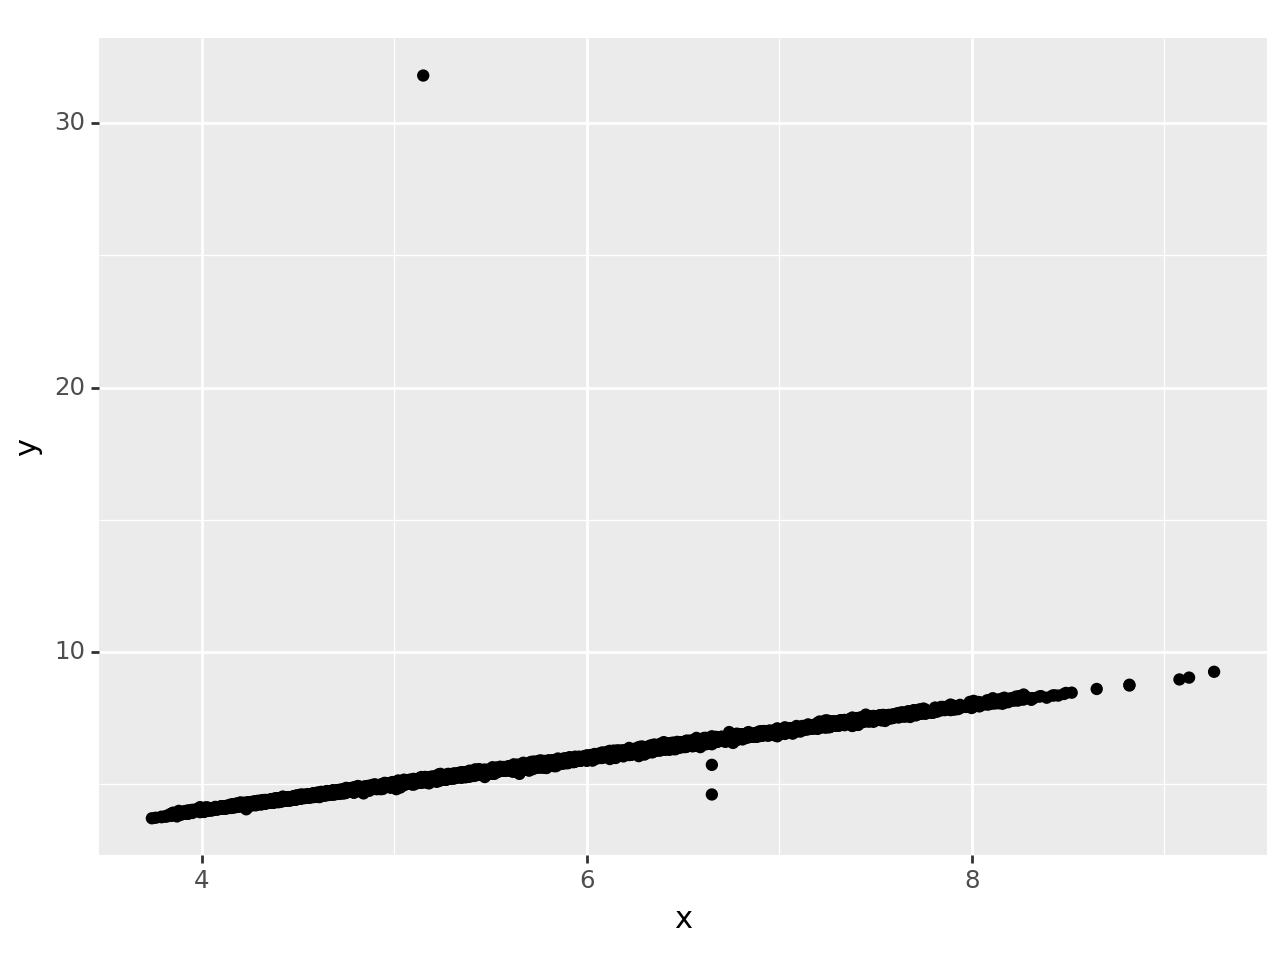

<Figure Size: (640 x 480)>

In [36]:
E_grade = diamonds_df[diamonds_df.color == "E"]
(
    ggplot(E_grade) +
    aes(
        x = "x",
        y = "y"
    ) +
    geom_point()
)
####
# there is almost a perfect 1 to 1 correlation between x and y dim

e. Now repeat d, but comparing x to z.  What can you say about the shapes of gems?

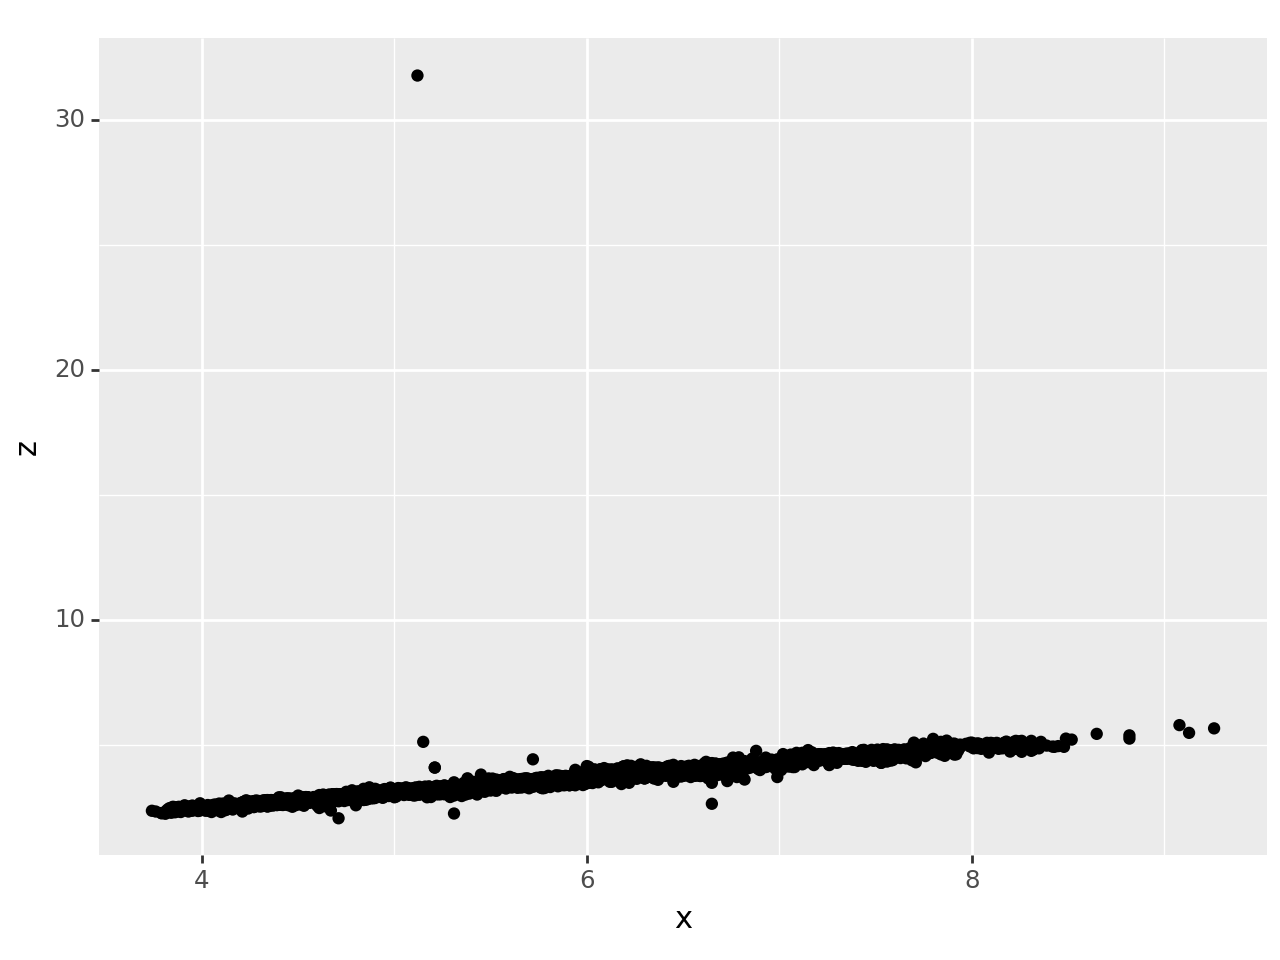

<Figure Size: (640 x 480)>

In [37]:
(
    ggplot(E_grade) +
    aes(
        x = "x",
        y = "z"
    ) +
    geom_point()
)

# We can say that the depth of the diamonds 
# are approximately half the length of the diamond base
# which is close to being square in area


f. Here we will ask whether each of the diamonds are compact, ie the extent to which they are spherical or not.
To do so, we will first calculate the volume that the diamond would take up if  the X-Y-Z dimensions of the diamond defined an ovoid.  In this case, the volume of the diamond would be

$$ V = \frac{4 \pi}{3} xyz $$.

Add a column ```Ovoid volume``` to the diamonds dataframe that has this hypothetical volume.

In [11]:
diamonds_df["Ovoid volume"] = (4*np.pi/3) * diamonds_df.x * diamonds_df.y * diamonds_df.z

g. A carat is 200 mg, so it is a measure of weight.  Given the data we have, here we will estimate the compactness of each of the diamonds by dividing the putative ovoid volume by the weight of the diamond.  Add a column to the diamonds dataframe ```Ovoid compactness``` that divides the ovoid volume by the number of carats.

In [12]:
diamonds_df["Ovoid compactness"] = diamonds_df["Ovoid volume"] / diamonds_df.carat

h.  Now, let's use this measure to see if different cuts have different extents of compactness.  Find the average compactness for each of the cuts by grouping the diamonds by cut and taking the mean.

In [13]:
cut_df = diamonds_df.groupby("cut")["Ovoid compactness"].mean().reset_index()
cut_df

,cut,Ovoid compactness
0,Fair,663.746439
1,Good,675.273387
2,Ideal,689.741170
3,Premium,682.062875
4,Very Good,682.734196


i.  Make a bar graph that compares the mean compactness of each of the cuts using the ```ggplot2``` software we discussed in class.  Use appropriate axis labels.

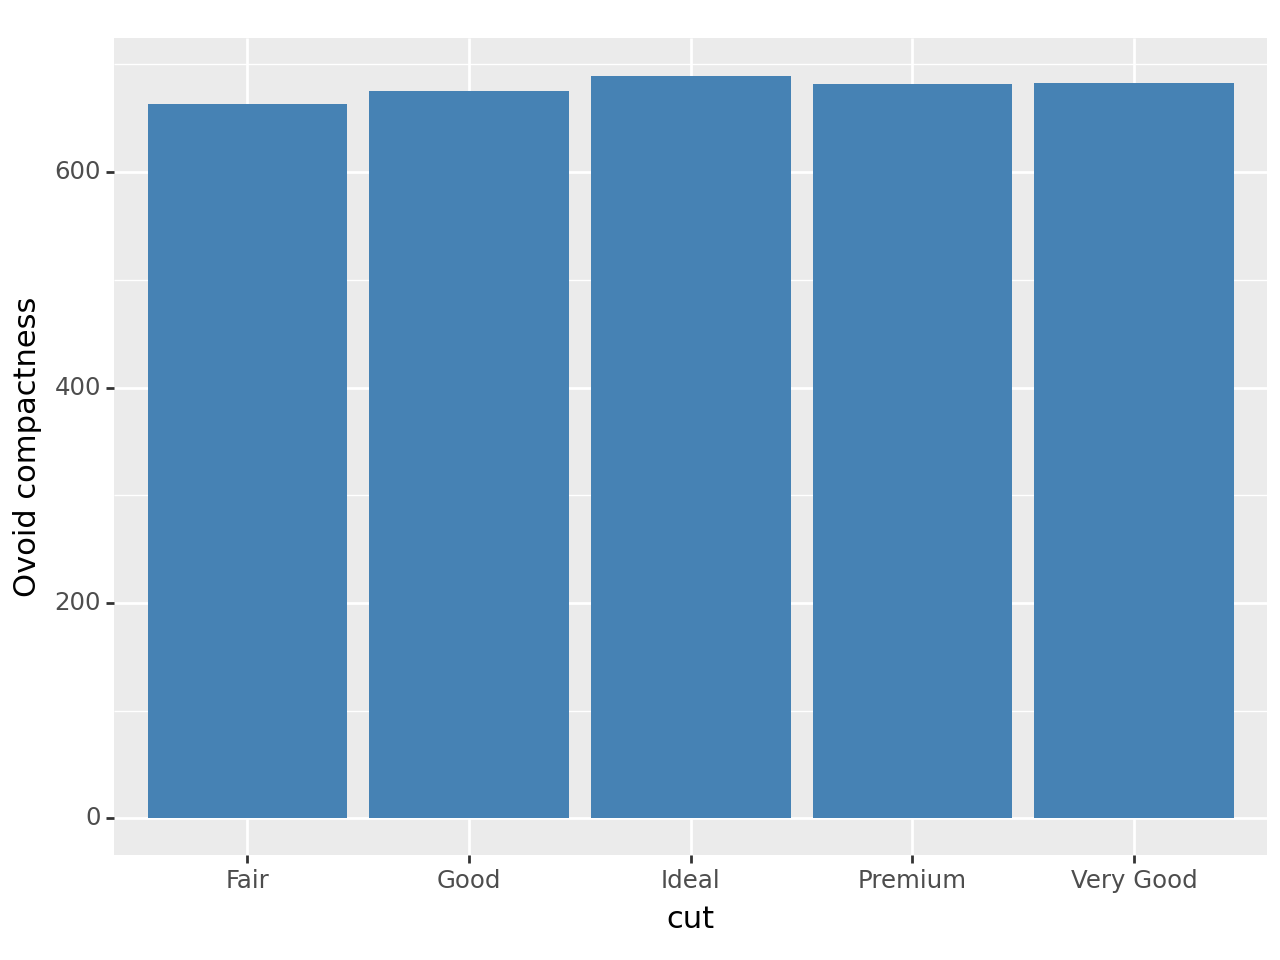

<Figure Size: (640 x 480)>

In [14]:
(
    ggplot(cut_df) +
    aes(x="cut", y="Ovoid compactness") +
    geom_bar(stat="identity", fill="steelblue")
)

j.  Now let's also investigate the distribution of compactness for each cut.  Create a boxplot that compares the distribution of compactness values for each cut.  Use appropriate axis labels for your graph

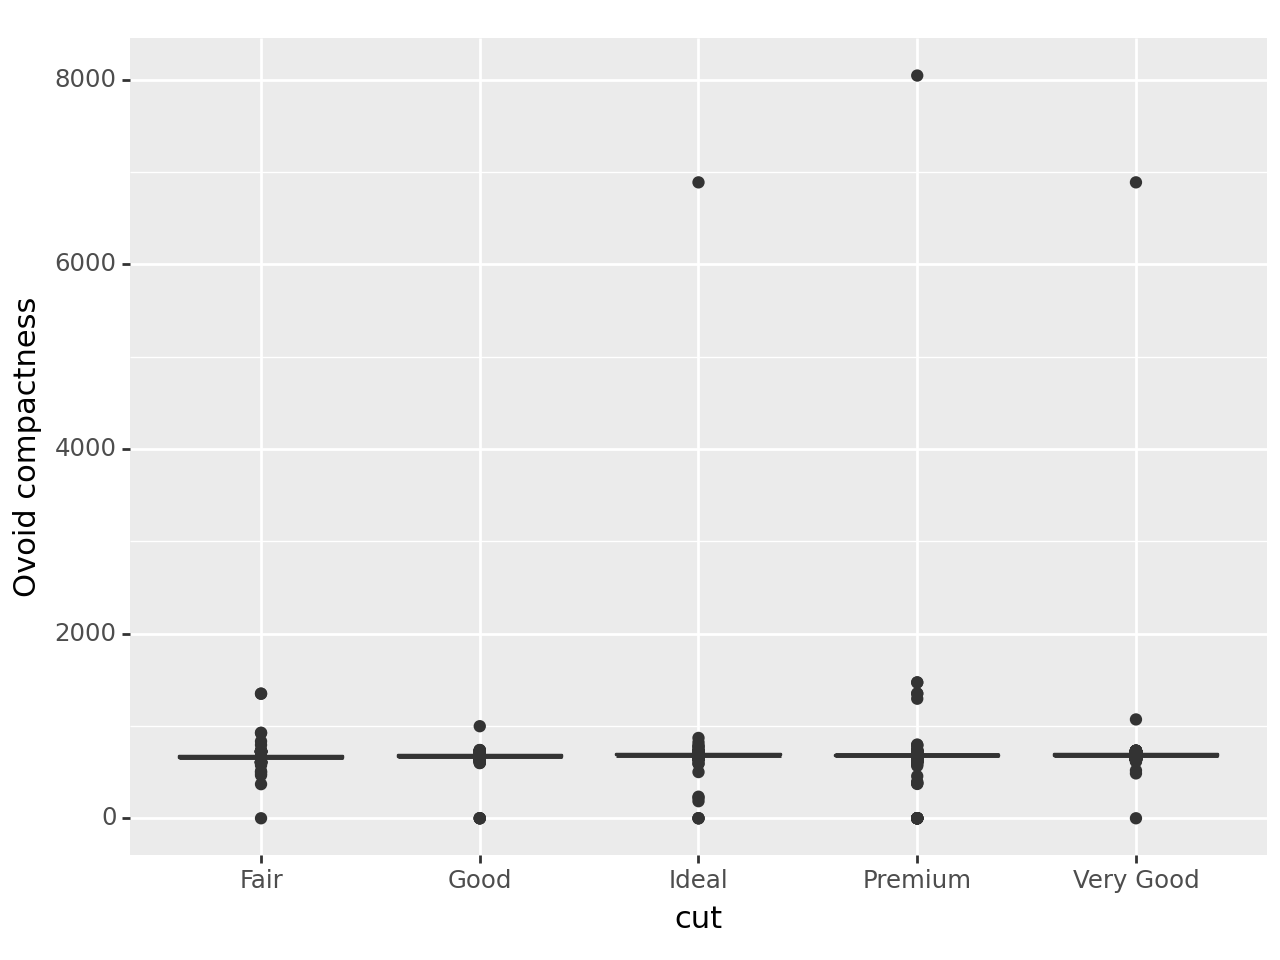

<Figure Size: (640 x 480)>

In [15]:
(
    ggplot(diamonds_df) +
    aes(x="cut", y="Ovoid compactness") +
    geom_boxplot(fill="steelblue")
)

## Electrophysiology

a.  The file ```conductance_data_for_seeds_v2.xlsx``` lists a set of measured values of conductance of single macromolecular structures.  There are three sheets in the dataframe. Load each of the sheets of the Excel file into Python in three dataframes, one for each sheet, so that the headers in the spreadsheet become the column names in your dataframe.  Your three dataframes should be stored in an array ```conductance_df_array``` in indices 0-2 in the order the sheets are provided.

In [16]:
FILE = pd.ExcelFile("conductance_data_for_seeds_v3.xlsx")
conductance_df_array = [pd.read_excel(FILE, sheet) for sheet in FILE.sheet_names]

b.  You can see that each of the sheets has a title -- the type of structure being characterized.  Combine this data into a single dataframe ```conductances``` in which the type of structure being characterized is listed in a column as a categorical variable.  Do this by reading the names of the sheets from the Excel file using Python, not manually (later you may need to do this for many more sheets, so this is a good skill to learn).

In [17]:
for df, sheet in zip(conductance_df_array, FILE.sheet_names):
    df["name"] = sheet
conductances = pd.concat([df for df in conductance_df_array])
conductances

,Conductance [pS],No. of channels,name
0,325,0,nanotube_seeds
1,350,0,nanotube_seeds
2,375,0,nanotube_seeds
3,400,0,nanotube_seeds
4,425,0,nanotube_seeds
...,...,...,...
107,2725,1,shuttered_seeds
108,2750,0,shuttered_seeds
109,2775,0,shuttered_seeds
110,2800,0,shuttered_seeds


c.  You can notice that the data is not stored so that there is one observation per row.  Write code to transform ```conductances``` into a tidy dataset in which each observation is in its own row.

In [38]:
#data inherently tidy due to use of concatenation in 2b
conductances

,Conductance [pS],No. of channels,name
0,325,0,nanotube_seeds
1,350,0,nanotube_seeds
2,375,0,nanotube_seeds
3,400,0,nanotube_seeds
4,425,0,nanotube_seeds
...,...,...,...
107,2725,1,shuttered_seeds
108,2750,0,shuttered_seeds
109,2775,0,shuttered_seeds
110,2800,0,shuttered_seeds


d.  Create a histogram of all of the conductances as a single plot.  Label your axes with appropriate names and units.

/home/vivek/miniconda3/envs/schulman/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


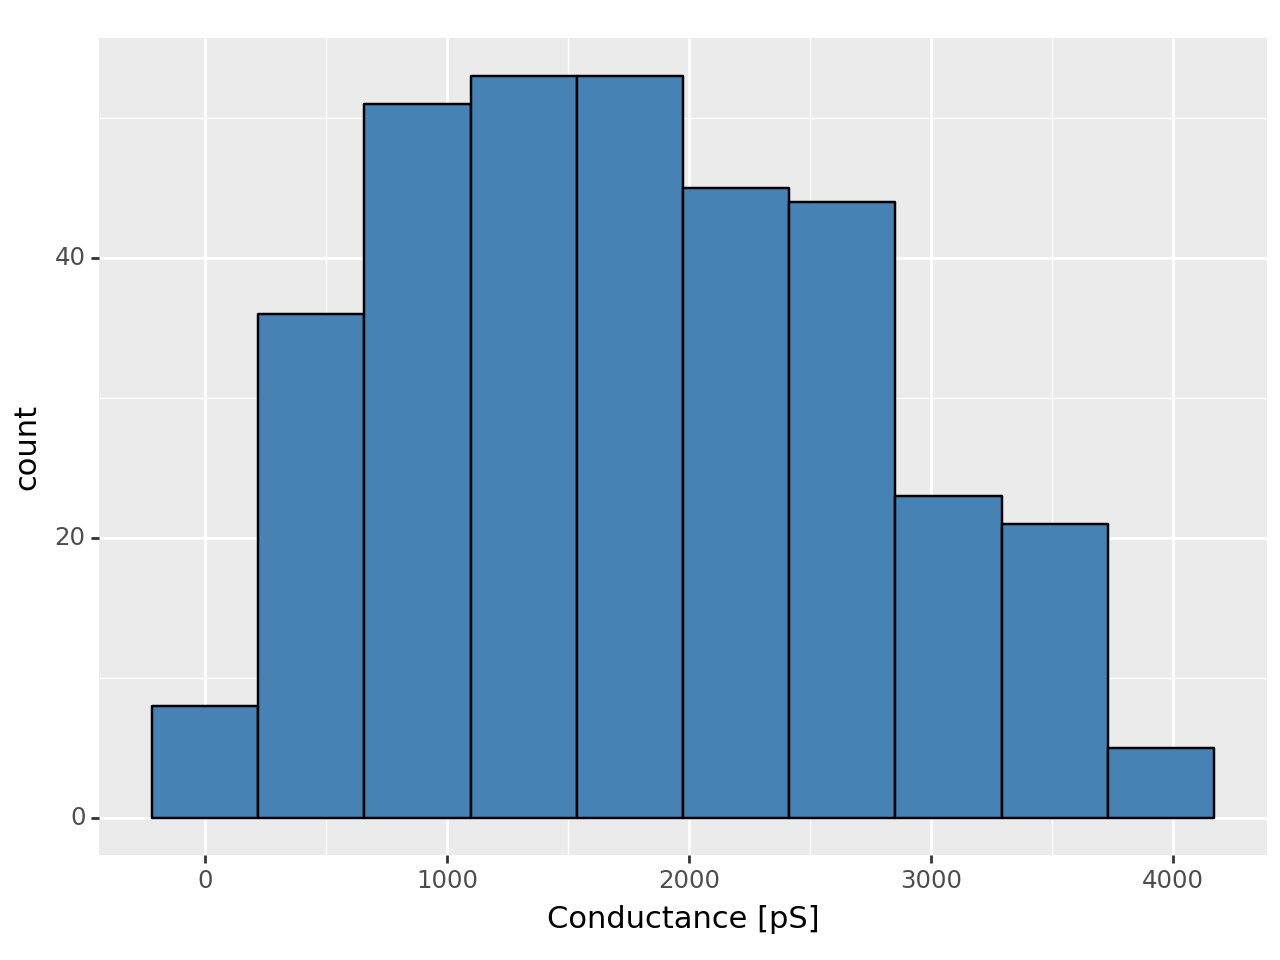

<Figure Size: (640 x 480)>

In [19]:
(
    ggplot(conductances) +
    aes("Conductance [pS]") +
    geom_histogram(fill="steelblue", color="black")
)

e.  Now create a faceted histogram in which the each of the three types of structures are plotted in their own histogram side by side.   Label your axes with appropriate names and units.

/home/vivek/miniconda3/envs/schulman/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 10'. Pick better value with 'binwidth'.


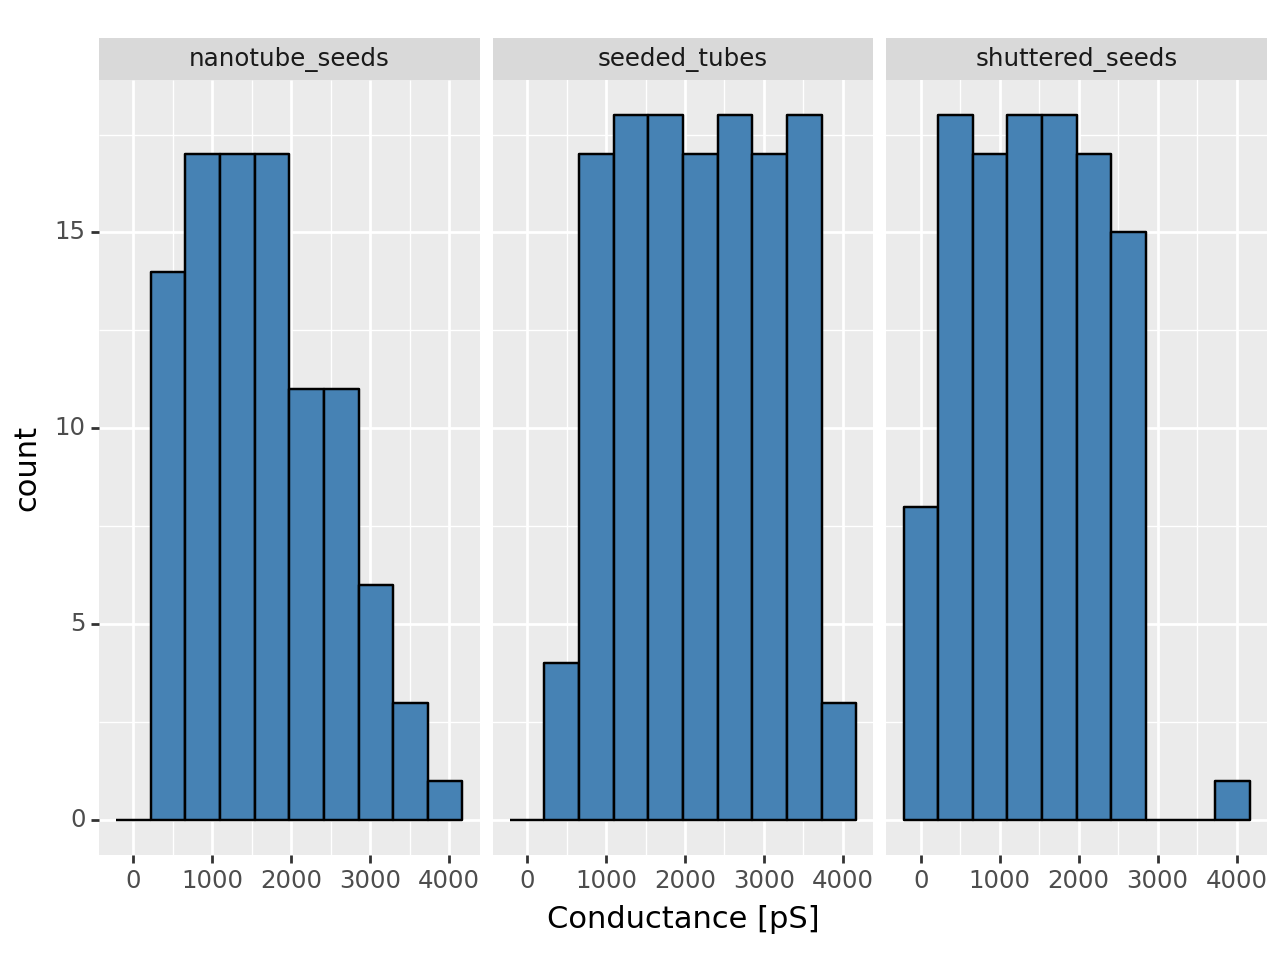

<Figure Size: (640 x 480)>

In [20]:
(
    ggplot(conductances) +
    aes("Conductance [pS]") +
    geom_histogram(fill="steelblue", color="black") +
    facet_wrap("name")
)

f.  What can you conclude about the conductances of the different structures from the histograms?

In [21]:
"""
    The conductance range for nanotube seeds have a mean conductance somwhere in the 1-2000 pS range. 
    Seeded tubes are have a uniform distribution with relatively equal likelihood of 750 - 3500.
    Shuttered tubes have a conductance primarily in the 500-2750 range with equal likelihood.
"""

'\n    The conductance range for nanotube seeds have a mean conductance somwhere in the 1-2000 pS range. \n    Seeded tubes are have a uniform distribution with relatively equal likelihood of 750 - 3500.\n    Shuttered tubes have a conductance primarily in the 500-2750 range with equal likelihood.\n'

## Filtering and joining

a.  In this problem we are going to consider data from a survey of countries by their happiness in 2017, in the file ```happiness_2017.csv``` and data about countries of the world ```world_countries.csv```.  Load each of these into two dataframes, ```happiness``` and ```country_data```

In [22]:
happiness = pd.read_csv("happiness_2017.csv")
country_data = pd.read_csv("world_countries.csv")

Inspect each of the dataframes.  You can see that the country data dataframe has extensive demographic data to support the happiness dataset.  We are going to make some comparisons by joining these datasets and plot the results.

b.  Use merging operations to add information about literacy to the happiness dataframe.  Create a scatter plot that relates literacy to happiness.  Use appropriate axis labels, and color code the datapoints by region.

In [23]:
happiness = happiness.merge(country_data[["Country", "Literacy"]], on="Country")

c.  Now let's do a similar analysis, in which we relate the fraction of people who have phones in a country to the amount of corruption in a country.  Group the results by region and create a scatter plot of the results (there will be many fewer regions than countries).  

/home/vivek/miniconda3/envs/schulman/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


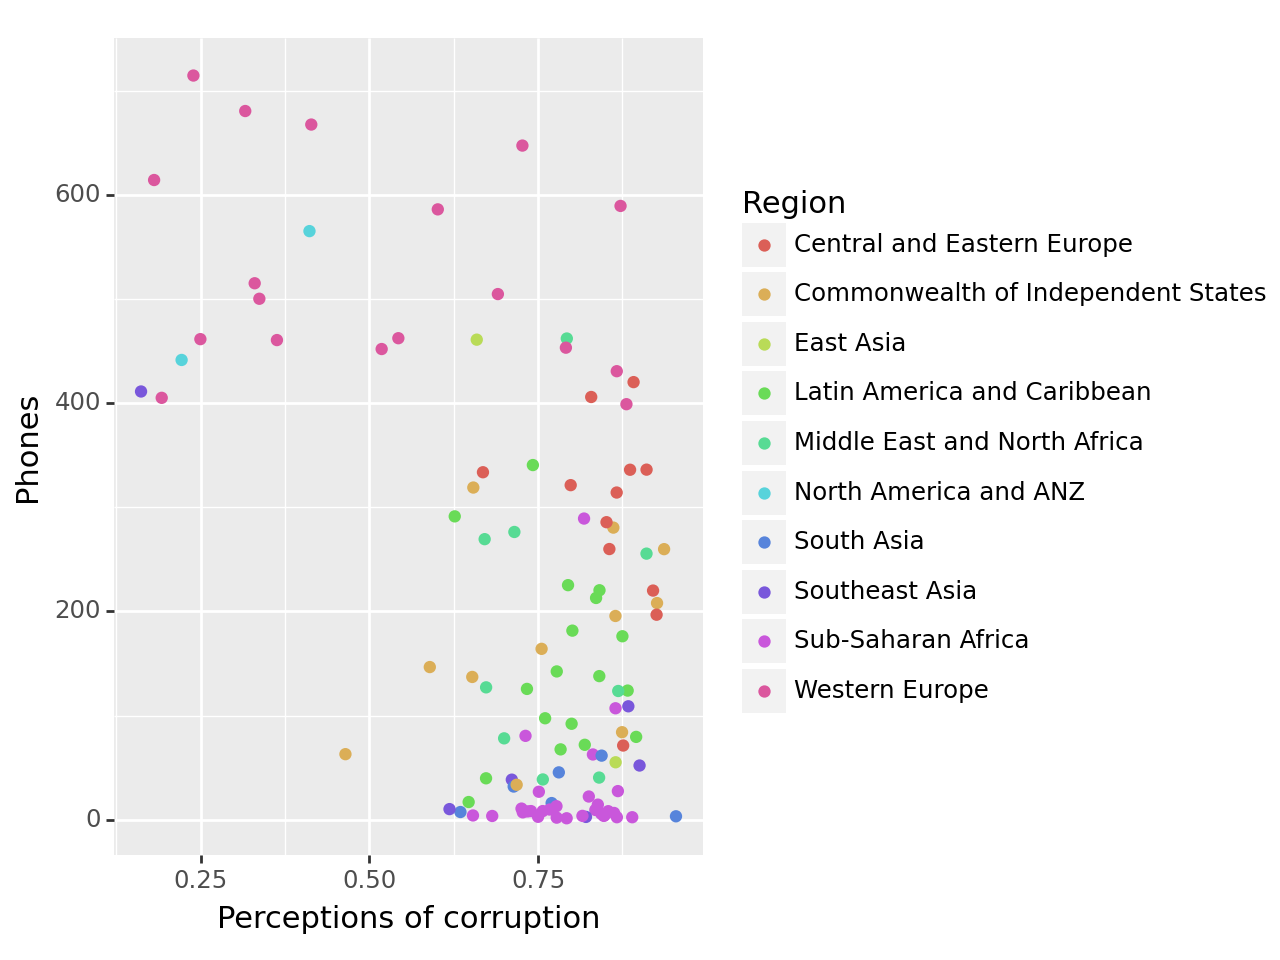

<Figure Size: (640 x 480)>

In [24]:
happiness = happiness.merge(country_data[["Country", "Phones"]], on="Country")

(
    ggplot(happiness) + 
    aes(
        x="Perceptions of corruption",
        y="Phones",
        color="Region"
        ) +
    geom_point()
)

f.  Now let's take a look at the countries that are very generous. Create a dataframe that contains the ten countries with highest generosity scores ```most_generous``` and another with those 10 rated as least generous ```least_generous```.

In [25]:
most_generous = happiness.sort_values("Generosity", ascending=False)[:10]
least_generous = happiness.sort_values("Generosity", ascending=True)[:10]

g.  Add a column listing the amount of arable land to each of the columns of the dataframes.

In [26]:
most_generous = most_generous.merge(country_data[["Country", "Arable"]], on="Country")
least_generous = least_generous.merge(country_data[["Country", "Arable"]], on="Country")

h.  Now compute the mean amount of arable land for each of these sets of countries.  Store these in ```mg_arable_mean``` and ```lg_arable_mean```.  

In [27]:
mg_arable_mean = most_generous["Arable"].mean()
lg_arable_mean = least_generous["Arable"].mean()
print(mg_arable_mean, lg_arable_mean)

13.282 14.766000000000002


i.  To understand whether these differences are meaningful, let's take a look at the distribution of arable land.  Generate the summary statistics for arable land:

In [28]:
print("Most Generous\n", most_generous["Arable"].describe())
print("\nLeast Generous\n", least_generous["Arable"].describe())

Most Generous
 count    10.000000
mean     13.282000
std      10.791792
min       0.070000
25%       5.837500
50%       9.700000
75%      23.830000
max      28.300000
Name: Arable, dtype: float64

Least Generous
 count    10.000000
mean     14.766000
std       9.193088
min       0.650000
25%      11.627500
50%      15.425000
75%      19.625000
max      30.930000
Name: Arable, dtype: float64


j.  Now create a scatter plot that helps you visualize the relationship between the amount of arable land of all the countries in the world.  Add a regression line relating these two values, and calculate the correlation coefficient of these two terms.  
Based the plot and this information, how would you characterize the relationship between arable land and generosity?

In [39]:
happiness = happiness.merge(country_data[["Country", "Arable"]], on="Country")

/home/vivek/miniconda3/envs/schulman/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


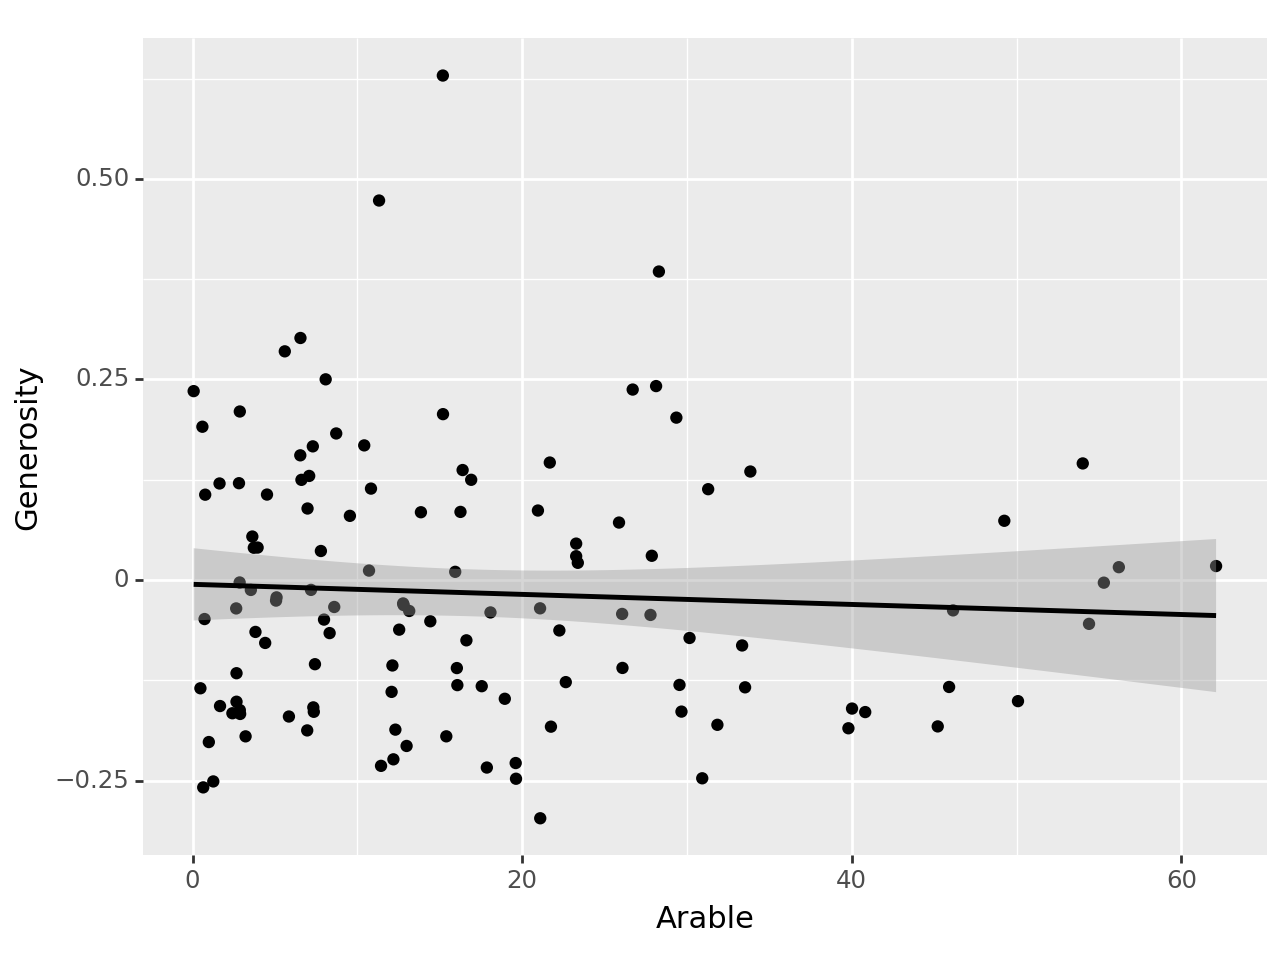

<Figure Size: (640 x 480)>

In [40]:
(
    ggplot(happiness) +
    aes(
        x = "Arable",
        y = "Generosity",
    ) +
    geom_point() +
    geom_smooth(method="lm")
)

There's a nonlinear relationship between Generosity and Arability but no linear relationship. However, you can see cluster of points where countries are both less generous and have less arable lands.

## Cleaning genomics data (540.605 only)

The data in the spreadsheet ```data-for-analysis-miRNA-cancer``` is a set of next-generation sequencing reads for a range of tissue samples.  The sample names are given by codes on the second row of the dataframe.  The possible miRNA sequences that are read are the rows and three attributes for each tissue sample are given, the total number of reads, the read frequency and whether the reads were crossmapped. 

The data for this problem was kindly provided by the authors of this article:
Zhang, C. et al. Nat. Nanotechnol. https://doi.org/10.1038/s41565020-0699-0 (2020)


a.  This data is not in tidy format.  Clean up the data so that each observation, *i.e.* each tissue sample is a row and the frequency and number of reads of each type of miRNA are the columns (we will not consider the cross-mapped attribute for this exercise.)  Store the result in ```miRNA_tidy```

In [449]:
miRNA_df = pd.read_excel("data for analysis-miRNA-cancer.xlsx")
miRNA_df_og = miRNA_df
miRNA_df = miRNA_df.loc[:, miRNA_df.loc[0] != "cross-mapped"].T

In [ ]:
miRNA_df_og

In [450]:
# miRNA_df_og = miRNA_df
# miRNA_df.columns = miRNA_df.loc[0]
miRNA_df.columns = miRNA_df.iloc[0]
miRNA_df = miRNA_df.drop("Hybridization REF")
miRNA_df.index = [
    i for i in miRNA_df.index[::2]
        for _ in range(2)
]
miRNA_tidy = miRNA_df

In [446]:
miRNA_tidy = miRNA_df

In [ ]:
# row_major = tuple(item for item in miRNA_df.index[::2] for _ in range(2)) 
# row_minor = tuple(miRNA_df["miRNA_ID"][:])
# assert len(row_major) == len(row_minor)
# arrays = [
#     np.array(row_major),
#     np.array(row_minor),
# ]
# miRNA_tidy = pd.DataFrame(data=miRNA_df, index=arrays).drop("miRNA_ID", axis=1)
# for i in range(len(miRNA_tidy)):
#     miRNA_tidy.iloc[:, i] = miRNA_df.iloc[:, i + 1]
# miRNA_tidy = miRNA.T.dropna().T

b.  Here the tissue samples are labeled with a standard TGCA barcode.  A description of how TGCA barcodes work is found here:
https://docs.gdc.cancer.gov/Encyclopedia/pages/TCGA_Barcode/

The specimen ID also contains the diagnosis. Read over this description to understand how this information is encoded.

Write a python function ```patient_diagnosis``` that takes the specimen ID and returns 'normal' if the specimen type is normal and 'tumor' if the specimen type is of a tumor.

In [425]:
def patient_diagnosis(specimen_ID):
    num = int(specimen_ID[13:15])
    
    if num in range(1, 10):
        return "tumor"
    elif num in range(10, 20):
        return "normal"
    else:
        return "control sample"
    

c.  Use this function to add a column to create a separate dataframe ```barcode_values``` with two columns: ````TGCA_barcode``` and ```diagnosis``.  

In [426]:
TGCA_barcodes = miRNA_df.index[::2] #remove Hybridization ref
TGCA_barcodes = [TGCA_barcode for TGCA_barcode in TGCA_barcodes for _ in range(2)]
# print(len(TGCA_barcodes))
diagnosis = [patient_diagnosis(TGCA_barcode) for TGCA_barcode in TGCA_barcodes]
barcode_values = pd.DataFrame({
    'TGCA barcode' : TGCA_barcodes,
    'diagnosis' : diagnosis
})

d.  Now let's try to take a look at this data to attempt to identify miRNAs that might on their own be indicative of a patient having a tumor.  Add the ```diagnosis``` column to the ```miRNA_tidy``` dataframe by merging that dataframe with the dataframe you made in c.

In [337]:
# miRNA_df.rename(columns={'Hybridization REF' : "TGCA barcode"}, inplace=True)

In [451]:
# miRNA_df_barcode = miRNA_df
miRNA_tidy.reset_index(inplace=True)
miRNA_tidy.rename(columns={"index" : "TGCA barcode"}, inplace=True)
# assert miRNA_tidy["TGCA barcode"] == barcode_values["TGCA barcode"]
miRNA_tidy = pd.merge(miRNA_tidy, barcode_values, on="TGCA barcode")[::2]

e.  Now group your data by diagnosis and create a summary of the mean reads per million of each of the types of miRNA.  Call this ```mean_freq_by_diagnosis```.

In [457]:
mean_freq_by_diagnosis = miRNA_tidy[1::2].iloc[:, 2:].groupby("diagnosis").mean()
mean_freq_by_diagnosis

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
diagnosis,,,,,,,,,,,,,,,,,,,,,
normal,10360.710417,20689.439412,10402.087953,24805.388873,2845.438443,593.461119,1034.795975,24.878983,9029.335729,463.46947,...,0.0,0.0,7.796303,0.052534,1.820054,2.238499,4.320773,49.309076,873.695932,27549.893139
tumor,6436.960632,12869.117498,6483.346179,15586.225821,1724.819263,681.39788,999.570285,18.823852,7809.987627,514.256946,...,0.0,0.0,14.500948,0.08662,188.922899,3.353386,38.805455,66.346253,469.666271,23897.614043


f.  Now let's filter this dataframe to find miRNA values that might differ.  Create a table of all miRNA values for which the mean reads per million is at least 25% higher on average for tumor samples vs normal samples. Store that in the variable ```tumor_25_higher```

In [520]:
tumor_25_higher = miRNA_tidy[1::2][miRNA_tidy[1::2][miRNA_tidy[1::2]["diagnosis"] == "tumor"].iloc[:, 2:-1] >= 1.25 * mean_freq_by_diagnosis.iloc[1, :]]
tumor_25_higher.iloc[:, :2] = miRNA_tidy.iloc[:, :2]
tumor_25_higher

,TGCA barcode,miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,...,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,diagnosis
2,TCGA-18-5592-01A-01T-1634-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,NaN,1748.041408,NaN,NaN,...,0,NaN,0.994335,238.640465,NaN,95.456186,93.467516,NaN,NaN,NaN
6,TCGA-18-5595-01A-01T-1634-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,24295.057027,3577.340401,1496.239666,NaN,NaN,...,0,77.742269,NaN,419.808252,NaN,58.60571,NaN,1057.294856,42161.426439,NaN
10,TCGA-21-5782-01A-01T-1634-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,237.157707,NaN,NaN,83.649525,NaN,31950.049025,NaN
14,TCGA-21-5783-01A-41H-2186-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,NaN,NaN,1310.25334,NaN,...,0,NaN,0.665948,NaN,NaN,NaN,NaN,NaN,44907.559712,NaN
18,TCGA-21-5784-01A-01T-1634-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,23486.098875,NaN,NaN,NaN,NaN,...,0,NaN,0.278192,NaN,5.563844,NaN,NaN,639.285691,40942.381665,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,TCGA-O2-A52S-01A-11H-A263-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,NaN,1029.038126,NaN,25.574829,...,0,NaN,NaN,963.473564,NaN,NaN,NaN,NaN,NaN,NaN
1534,TCGA-O2-A52V-01A-31H-A263-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1538,TCGA-O2-A52W-01A-11H-A26V-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,2244.515827,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,635.240328,NaN,NaN
1542,TCGA-O2-A5IB-01A-11H-A27R-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,7155.758773,NaN,NaN,23.985001,...,0,NaN,NaN,NaN,NaN,93.31391,183.126359,930.863147,NaN,NaN


g.  Repeat (f) but for reads per million that are at least 25% *lower* on average. Store that in the variable ```tumor_25_lower```

In [518]:
tumor_25_lower = miRNA_tidy[1::2][miRNA_tidy[1::2][miRNA_tidy[1::2]["diagnosis"] == "tumor"].iloc[:, 2:-1] <= 0.85 * mean_freq_by_diagnosis.iloc[1, :]]
tumor_25_lower.iloc[:, :2] = miRNA_tidy.iloc[:, :2]
tumor_25_lower

,TGCA barcode,miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,...,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,diagnosis
2,TCGA-18-5592-01A-01T-1634-13,reads_per_million_miRNA_mapped,NaN,NaN,NaN,NaN,403.70012,NaN,553.844746,NaN,...,0,11.932023,NaN,NaN,1.988671,NaN,NaN,99.433527,NaN,NaN
6,TCGA-18-5595-01A-01T-1634-13,reads_per_million_miRNA_mapped,5348.668096,10618.397887,5498.172459,NaN,NaN,NaN,682.935931,NaN,...,0,NaN,0,NaN,1.196035,NaN,NaN,NaN,NaN,NaN
10,TCGA-21-5782-01A-01T-1634-13,reads_per_million_miRNA_mapped,3829.339596,7731.024727,3852.399735,NaN,NaN,NaN,552.539023,14.016947,...,0,9.495351,0,NaN,2.486878,NaN,NaN,NaN,NaN,NaN
14,TCGA-21-5783-01A-41H-2186-13,reads_per_million_miRNA_mapped,4114.228785,8111.916613,4126.215855,12566.112021,NaN,NaN,NaN,12.653018,...,0,9.989225,NaN,99.559275,2.663793,28.968752,NaN,NaN,NaN,NaN
18,TCGA-21-5784-01A-01T-1634-13,reads_per_million_miRNA_mapped,5035.557137,10008.79922,5005.512379,NaN,NaN,NaN,692.698595,NaN,...,0,8.623958,NaN,42.285215,NaN,18.082493,55.360249,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,TCGA-O2-A52S-01A-11H-A263-13,reads_per_million_miRNA_mapped,4451.880261,8931.19534,4419.330479,6637.365662,306.432953,NaN,614.725894,NaN,...,0,NaN,0,NaN,0.929994,NaN,NaN,124.619168,17488.06818,NaN
1534,TCGA-O2-A52V-01A-31H-A263-13,reads_per_million_miRNA_mapped,5131.082659,10209.391077,5178.294211,7411.215183,888.461497,287.833569,NaN,NaN,...,0,9.128518,0,110.540642,2.139496,29.952948,45.927854,262.872779,14746.40693,NaN
1538,TCGA-O2-A52W-01A-11H-A26V-13,reads_per_million_miRNA_mapped,4156.836712,8389.022277,4248.410318,7046.492717,NaN,378.669235,485.642606,NaN,...,0,11.549824,0,NaN,2.749958,NaN,42.899347,NaN,14243.133148,NaN
1542,TCGA-O2-A5IB-01A-11H-A27R-13,reads_per_million_miRNA_mapped,5322.569378,10547.798168,5400.82701,NaN,NaN,522.767981,NaN,NaN,...,0,12.080037,0,0.700292,1.925803,NaN,NaN,NaN,NaN,NaN


h.  Now let's try one more thing -- it will be hard to count on reads per million below about 50.  Combine your results from (f) and (g) but restrict your list to only those miRNA whose mean reads per million is at least 50.  Store that in the variable ```tumor_different_and_frequent``` 

In [523]:
tumor_25_diff = pd.concat([tumor_25_higher, tumor_25_lower])
tumor_25_diff[miRNA_tidy[::2].iloc[:, 2:-1] > 50]

,TGCA barcode,miRNA_ID,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,...,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,diagnosis
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
